In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans


In [25]:
# Load dataset
data = pd.read_csv('/content/drive/MyDrive/climate_change.csv')
print(data.head())
print("\nInfo:\n", data.info())
print("\nMissing values:\n", data.isnull().sum())


   Year  Month    MEI     CO2      CH4      N2O   CFC-11   CFC-12        TSI  \
0  1983      5  2.556  345.96  1638.59  303.677  191.324  350.113  1366.1024   
1  1983      6  2.167  345.52  1633.71  303.746  192.057  351.848  1366.1208   
2  1983      7  1.741  344.15  1633.22  303.795  192.818  353.725  1366.2850   
3  1983      8  1.130  342.25  1631.35  303.839  193.602  355.633  1366.4202   
4  1983      9  0.428  340.17  1648.40  303.901  194.392  357.465  1366.2335   

   Aerosols   Temp  
0    0.0863  0.109  
1    0.0794  0.118  
2    0.0731  0.137  
3    0.0673  0.176  
4    0.0619  0.149  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       

In [19]:
print("Columns in dataset:", data.columns.tolist())


Columns in dataset: ['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols', 'Temp']


In [26]:
# Features (drop Temp) and Target (Temp)
X = data.drop(columns=["Temp"])
y = data["Temp"]

# If you want to predict categories instead of raw temperature,
# you can discretize temperature into bins (classification task)
y_class = pd.qcut(y, q=3, labels=[0,1,2])   # 3 categories (Low/Medium/High)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_class, test_size=0.2, random_state=42
)


In [27]:
kmeans = KMeans(n_clusters=len(np.unique(y_class)), random_state=42, n_init=10)
kmeans.fit(X_scaled)
kmeans_labels = kmeans.labels_

print("KMeans Clustering Accuracy:", accuracy_score(y_class, kmeans_labels))


KMeans Clustering Accuracy: 0.2792207792207792


In [28]:
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(confusion_matrix(y_test, y_pred_nb))
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.6612903225806451
[[17  5  2]
 [ 5  6  8]
 [ 0  1 18]]

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        24
           1       0.50      0.32      0.39        19
           2       0.64      0.95      0.77        19

    accuracy                           0.66        62
   macro avg       0.64      0.66      0.63        62
weighted avg       0.65      0.66      0.64        62



In [29]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))
print("\nDecision Tree Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7258064516129032
[[16  7  1]
 [ 4 14  1]
 [ 0  4 15]]

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.80      0.67      0.73        24
           1       0.56      0.74      0.64        19
           2       0.88      0.79      0.83        19

    accuracy                           0.73        62
   macro avg       0.75      0.73      0.73        62
weighted avg       0.75      0.73      0.73        62



In [30]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8387096774193549
[[19  5  0]
 [ 3 15  1]
 [ 0  1 18]]

Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.71      0.79      0.75        19
           2       0.95      0.95      0.95        19

    accuracy                           0.84        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.84      0.84      0.84        62



In [31]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print("\nRandom Forest Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.8387096774193549
[[19  5  0]
 [ 3 15  1]
 [ 0  1 18]]

Random Forest Report:
               precision    recall  f1-score   support

           0       0.86      0.79      0.83        24
           1       0.71      0.79      0.75        19
           2       0.95      0.95      0.95        19

    accuracy                           0.84        62
   macro avg       0.84      0.84      0.84        62
weighted avg       0.84      0.84      0.84        62



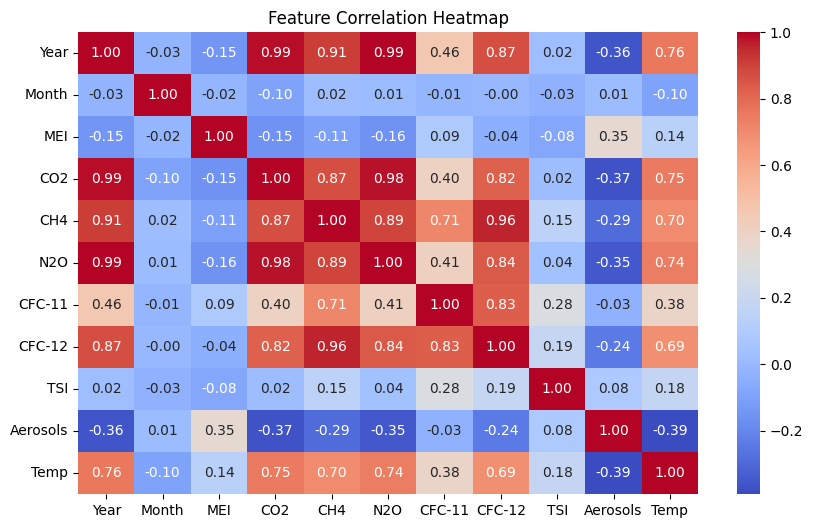

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


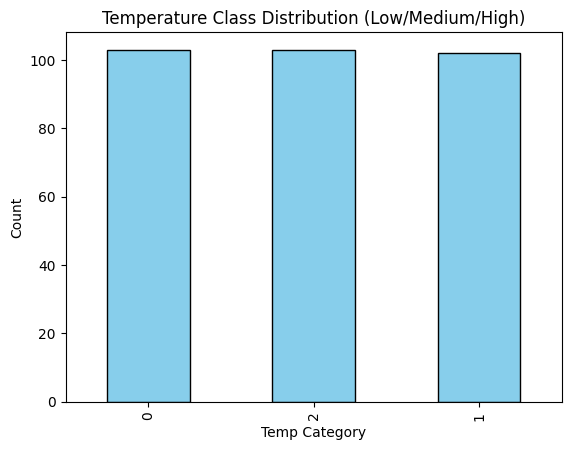

In [34]:
y_class.value_counts().plot(kind='bar', color="skyblue", edgecolor="black")
plt.title("Temperature Class Distribution (Low/Medium/High)")
plt.xlabel("Temp Category")
plt.ylabel("Count")
plt.show()
